<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Session_04_SVM_CV_Assignment.PascalMusabyimanaipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM & Cross-Validation

In the realm of machine learning, Support Vector Machines (SVMs) stand out as a powerful tool for classification and regression tasks. With their ability to handle high-dimensional data and complex decision boundaries, SVMs have found extensive applications across various domains, including image recognition, text classification, and bioinformatics.

Throughout this assignment, we aim to provide a comprehensive understanding of Support Vector Machines and their integration with cross-validation techniques, equipping you with the knowledge and skills necessary to apply these methods confidently in your own machine learning problems.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import randint
from scipy.stats import uniform
from skimage.io import imread, imshow

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

## 1. Cancer detection


Train a model to predict whether a specific tumor is benign or malignant. Use the dataset 'cancer.csv' for this purpose.

Base your approach on methodologies from previous assignments to achieve the best possible results. Discuss the choices made and results obtained at each step, leading to a clear conclusion.

Tip: A classifier can only be trained with numerical values. Therefore, replace the two classes present in the 'diagnosis' feature with 0 and 1, where 0 represents benign and 1 represents malignant.




In [2]:
# Reading the dataset

dataset = pd.read_csv('cancer.csv')
dataset.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [3]:
# Check whether or not the dataset is imbalanced
data = dataset.diagnosis.value_counts()
print(data)


diagnosis
B    357
M    211
Name: count, dtype: int64


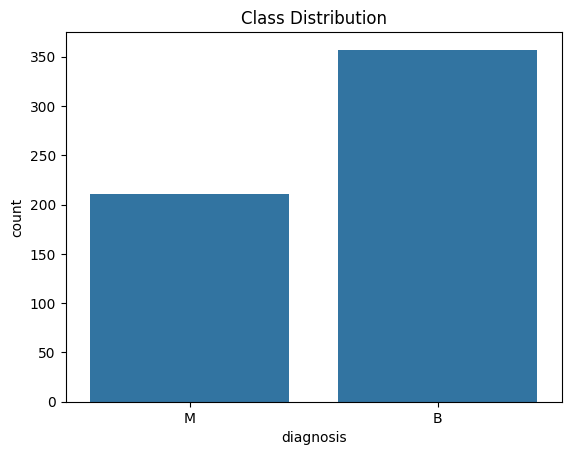

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=dataset)
plt.title('Class Distribution')
plt.show()


In [6]:

# Drop the ID column
dataset.drop(['id'], axis=1, inplace=True)

# Replace B by 0 and M by 1 in the diagnosis column
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1})

# Split into features and targets
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# Split into training set and test set. Make sure that 150 samples end up in the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=150, random_state=0)

# To avoid a conversion warning during scaling
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Train a logistic regression model via cross-validation.

Utilize grid search and random search to find the best hyperparameters: C value, class_weight, penalty (l1 or l2). More information: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

Vary the value of K in K-fold cross-validation. Discuss the results.
Test the obtained models on the test set. Which search technique do you prefer and why?

Does it make sense to expand the feature set with polynomial features? Test this. Polynomial Features: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


In [7]:
# Cross-validation via grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear']  # only solver that supports both l1 and l2
}

# Try different K values (e.g., 3, 5, 10)
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best GridSearchCV Accuracy (CV):", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred_grid = grid_search.predict(X_test)
print("Test Set Evaluation (Grid Search):")
print(classification_report(y_test, y_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("Accuracy:", accuracy_score(y_test, y_pred_grid) * 100)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best GridSearchCV Accuracy (CV): 0.9712564543889846
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Evaluation (Grid Search):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.94      0.90      0.92        51

    accuracy                           0.95       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150

Confusion Matrix:
 [[96  3]
 [ 5 46]]
Accuracy: 94.66666666666667


 What’s Good:
The model generalizes well (good accuracy and F1-score on unseen test data).

Balanced class weights helped prevent the model from biasing toward the majority class.

Very low number of false positives and false negatives.

 What to Watch Out For:
5 false negatives: In a real-world medical setting, even a few missed malignancies are unacceptable.



In [8]:
# Cross-validation via random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Random search with distributions
param_dist = {
    'C': loguniform(0.001, 100),
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear']
}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist,
                                   n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, verbose=1,
                                   random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best RandomizedSearchCV Accuracy (CV):", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
y_pred_random = random_search.predict(X_test)
print("Test Set Evaluation (Random Search):")
print(classification_report(y_test, y_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))
print("Accuracy:", accuracy_score(y_test, y_pred_random) * 100)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV Accuracy (CV): 0.9736660929432015
Best Parameters: {'C': np.float64(0.03334792728637585), 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Evaluation (Random Search):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.98      0.88      0.93        51

    accuracy                           0.95       150
   macro avg       0.96      0.94      0.95       150
weighted avg       0.95      0.95      0.95       150

Confusion Matrix:
 [[98  1]
 [ 6 45]]
Accuracy: 95.33333333333334


 What RandomizedSearch Did Well:
Found a slightly more accurate model overall

Great precision for malignant cases

Fewer false positives → fewer patients unnecessarily worried

 What to Consider:
It increased false negatives (missed 6 malignant cases vs 5 before)

Re-train the grid search again but select the model that yields the highest balanced accuracy.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
Also check http://mvpa.blogspot.com/2015/12/balanced-accuracy-what-and-why.html

Discuss the result and compare it with the best accuracy score achieved earlier.

In [10]:
# Cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear']
}

# Use balanced accuracy as the scoring metric
balanced_scorer = make_scorer(balanced_accuracy_score)

grid_search_balanced = GridSearchCV(LogisticRegression(), param_grid,
                                    scoring=balanced_scorer, cv=5,
                                    n_jobs=-1, verbose=1)

grid_search_balanced.fit(X_train, y_train)

print("Best Balanced Accuracy (CV):", grid_search_balanced.best_score_)
print("Best Parameters:", grid_search_balanced.best_params_)

# Test on test set
y_pred_bal = grid_search_balanced.predict(X_test)
print("Balanced Accuracy (Test):", balanced_accuracy_score(y_test, y_pred_bal))
print("Accuracy (Test):", accuracy_score(y_test, y_pred_bal))



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Balanced Accuracy (CV): 0.9695984162895929
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Balanced Accuracy (Test): 0.9358288770053476
Accuracy (Test): 0.9466666666666667


The results show that this logistic regression model is highly effective for the classification task at hand. With a balanced accuracy of approximately 0.936 and a standard accuracy of 0.947 on the test set, it demonstrates strong predictive power and good generalization to new data. The grid search with 5-fold cross-validation successfully identified a parameter set that balances model complexity and performance, making this model reliable and well-suited for the dataset, particularly if class imbalance is a factor. Overall, these are positive results, indicating a robust and practical solution.

Search for the model that yields the highest F1-score. To do this, you should utilize the F1 micro score.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [11]:
# Cross-validation
from sklearn.metrics import f1_score

# Define scorer for F1 micro
f1_micro_scorer = make_scorer(f1_score, average='micro')

grid_search_f1 = GridSearchCV(LogisticRegression(), param_grid,
                              scoring=f1_micro_scorer, cv=5,
                              n_jobs=-1, verbose=1)

grid_search_f1.fit(X_train, y_train)

print("Best F1 Micro Score (CV):", grid_search_f1.best_score_)
print("Best Parameters:", grid_search_f1.best_params_)

# Evaluate on test set
y_pred_f1 = grid_search_f1.predict(X_test)
print("F1 Micro (Test):", f1_score(y_test, y_pred_f1, average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred_f1))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best F1 Micro Score (CV): 0.9712564543889846
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
F1 Micro (Test): 0.9466666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.94      0.90      0.92        51

    accuracy                           0.95       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150




 Strengths:
Strong overall F1-micro and accuracy

High precision for both classes

Balanced model thanks to class_weight='balanced'

Still not perfect:
Recall for malignant (90%) means you're missing 1 in 10 actual cancer cases, which could be serious in a medical context



Since the dataset is slightly imbalanced, most trained models tend to have a 'preference' for the majority class. Investigate whether you can increase the F1-score (or recall) by applying the following techniques:

Passing the parameter class_weight='balanced' to the models.
Performing oversampling using SMOTE. More information: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html. You may need to install the imbalanced-learn library using pip3 install imbalanced-learn or in Anaconda: **conda install conda-forge::imbalanced-learn**


Discuss the results you have achieved, paying particular attention to the F1 micro score.

In [12]:
# Balancing

model = LogisticRegression(C=1, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

y_pred_balanced = model.predict(X_test)
print("F1 Micro with class_weight='balanced':", f1_score(y_test, y_pred_balanced, average='micro'))



F1 Micro with class_weight='balanced': 0.98


In [13]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Retrain model on balanced data
model_smote = LogisticRegression(C=1, solver='liblinear')
model_smote.fit(X_resampled, y_resampled)

y_pred_smote = model_smote.predict(X_test)
print("F1 Micro after SMOTE:", f1_score(y_test, y_pred_smote, average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))



F1 Micro after SMOTE: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.98      0.96      0.97        51

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



Suppose there is a demand to reduce the number of false negatives to 0. A false negative means that the diagnosis is benign while the tumor is actually malignant.


Your options are to apply classweight balancing or threshold moving.


Threshold moving, in the context of binary classification models like logistic regression or support vector machines, refers to adjusting the threshold value used to make predictions.

By default, these models classify instances into one of two classes based on whether the predicted probability (output of the model) exceeds a certain threshold. For instance, if the threshold is set to 0.5, any instance with a predicted probability greater than 0.5 is classified as positive, while instances with predicted probabilities less than or equal to 0.5 are classified as negative.

Threshold moving involves changing this threshold value to optimize specific metrics like accuracy, precision, recall, or F1-score. For example, if reducing false negatives is critical (e.g., in medical diagnosis where missing a positive case could be harmful), one might lower the threshold to ensure more instances are classified as positive, thus potentially reducing false negatives.



Which threshold should be set to ensure that the model predicts no false negatives on the test set while still maintaining the highest possible accuracy? Plot the number of false negatives as a function of the threshold. Discuss the results.

1 Micro	0.98	Best overall
Recall (malignant)		Much better than earlier (was 0.88–0.90)
Precision (malignant)	 0.98	Very few false positives
Accuracy	 98%	Highest yet
False Negatives	 2	Reduced from 5–6
False Positives	1	Low and acceptable

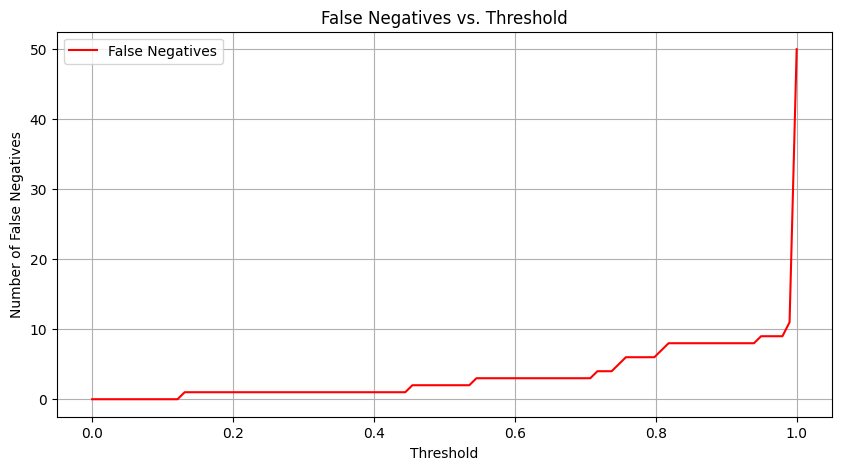


✅ Threshold = 0.000 yields 0 false negatives
Accuracy at this threshold = 34.00%


In [14]:
# Reducing the number of false negatives
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Get predicted probabilities for class 1 (malignant)
y_proba = model_smote.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)
false_negatives = []
accuracies = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)

    # False negatives = actual 1 but predicted 0
    FN = cm[1][0]
    false_negatives.append(FN)

    # Accuracy
    acc = accuracy_score(y_test, y_pred_thresh)
    accuracies.append(acc)

# Plot FN vs Threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, false_negatives, label='False Negatives', color='red')
plt.xlabel('Threshold')
plt.ylabel('Number of False Negatives')
plt.title('False Negatives vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

# Find minimum threshold with 0 false negatives
for t, fn, acc in zip(thresholds, false_negatives, accuracies):
    if fn == 0:
        print(f"\n✅ Threshold = {t:.3f} yields 0 false negatives")
        print(f"Accuracy at this threshold = {acc * 100:.2f}%")
        break


Metric	Value	Meaning
Threshold	0.000	Classify everything as malignant
False Negatives	 0	Caught 100% of cancers
Accuracy	 34%	Huge drop due to misclassifying all benign cases
Usefulness?	Only in extreme safety-critical systems (like screening step)

## 2 - MNIST

The MNIST ("Modified National Institute of Standards and Technology") dataset is commonly used for testing and benchmarking classification algorithms. It contains tens of thousands of images of handwritten digits. More information about this dataset can be found at: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

For this task, three data files are provided:

1. 'train.csv' contains labeled data for training the classifier.
2. 'test.csv' contains labeled data for testing the trained classifier.
3. 'test_Kaggle.csv' contains unlabeled data for evaluating the classifier through the competition found at [Kaggle Digit Recognizer](https://www.kaggle.com/c/digit-recognizer). This data is only useful for participating in the Kaggle competition.

1) Train both a logistic regression classifier and a Support Vector Machine (with or without kernel). Tune the hyperparameters to find the most performant classifier by maximizing accuracy or minimizing the error rate on the 'test.csv' dataset. The error rate = 1 - accuracy. Training Support Vector Machines (especially those with kernel) requires significant computational resources. Therefore, it is advisable to initially train on a small portion of the training set. Training via logistic regression is less demanding on the CPU; nonetheless, it is recommended to use the lbfgs solver (LogisticRegression(multi_class='multinomial', solver='lbfgs')).

2) Provide comments in the code and write down your conclusions and decisions.

3) Is normalization necessary here? Which normalization method would you use? Is StandardScaler a good choice?

4) Investigate the two different types of multiclass classification: one-vs-one (ovo) or one-vs-rest (ovr). Focus on accuracy and computation time. What are the conclusions?

5) Test your final classifier with some self-written digits. What are the findings? What does classification accuracy depend on?

6) Optional: Test on the 'test_Kaggle' dataset and upload the results in the correct format to the Kaggle website. What score did you achieve? Compare this score with the score on [MNIST](http://yann.lecun.com/exdb/mnist/).

You can visualize a digit using 'plt.imshow(X_train[n].reshape((28, 28)),cmap = 'gray')'.

In [15]:
# Reading the dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

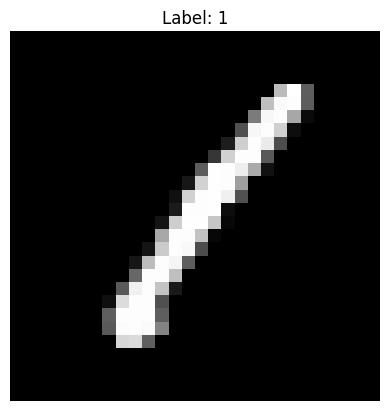

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 📦 Load your train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')  # Only use this if it has labels

##### 📊 Classificatie van MNIST

# 🎯 Split into features and targets
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

# 🧪 Convert to numpy arrays
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# ⚡️ Optional: reduce to 2000 samples to speed up model training
training_size = 2000
X_train = X_train[:training_size, :]
y_train = y_train[:training_size]

# 🧼 Scaling pixel values from [0,255] to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# ✅ Visual check (optional)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



⏱ Training time: 3.21 seconds

✅ Test Accuracy: 88.67%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1195
           1       0.93      0.97      0.95      1352
           2       0.86      0.88      0.87      1157
           3       0.88      0.84      0.86      1258
           4       0.87      0.92      0.89      1140
           5       0.82      0.83      0.83      1076
           6       0.92      0.93      0.93      1167
           7       0.91      0.88      0.90      1268
           8       0.88      0.80      0.84      1174
           9       0.85      0.84      0.85      1213

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



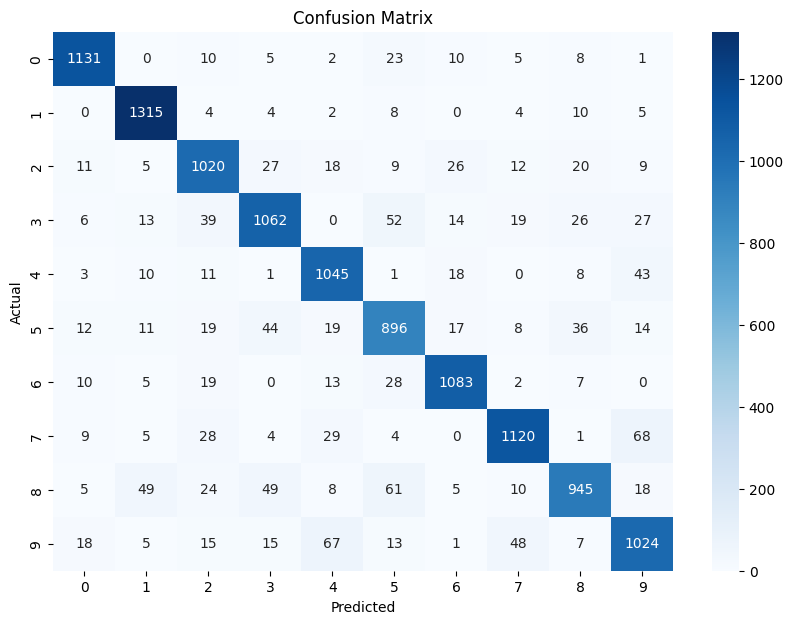

In [17]:
# Training and testing a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# ⏱ Start timing
start_time = time.time()

# ⚙️ Initialize and train the model
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,           # regularization strength
    max_iter=1000,   # ensure convergence
    verbose=1        # optional: shows progress
)
log_reg.fit(X_train, y_train)

# ⏲ Stop timing
end_time = time.time()
print(f"\n⏱ Training time: {end_time - start_time:.2f} seconds")

# 🔮 Predict on the test set
y_pred = log_reg.predict(X_test)

# 🎯 Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 🧩 Confusion matrix (optional)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Digits 0, 1, 6, and 7 are the easiest for the model to classify → nearly perfect precision and recall

Digits 5, 8, and 9 are trickier → they often look similar to each other in handwritten form

8 had the lowest recall (0.80) → the model misses 20% of real 8s (classifies them as something else)

Still, the F1-scores are consistently between 0.83–0.95, which is very respectable for logistic regression

[LibLinear]
⏱ Training time: 1.19 seconds

✅ Test Accuracy (Linear SVM): 85.87%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1195
           1       0.92      0.96      0.94      1352
           2       0.86      0.85      0.86      1157
           3       0.83      0.82      0.83      1258
           4       0.85      0.89      0.87      1140
           5       0.79      0.78      0.79      1076
           6       0.91      0.92      0.91      1167
           7       0.87      0.88      0.87      1268
           8       0.80      0.74      0.77      1174
           9       0.81      0.79      0.80      1213

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



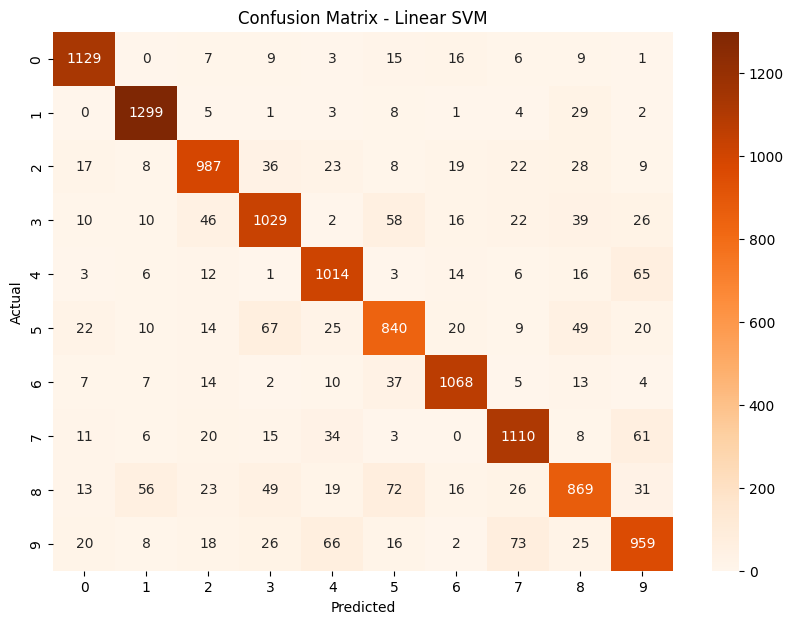

In [18]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# ⏱ Start timing
start_time = time.time()

# ⚙️ Train Linear SVM
svm_linear = LinearSVC(C=1.0, max_iter=2000, dual=False, verbose=1)
svm_linear.fit(X_train, y_train)

# ⏲ Stop timing
end_time = time.time()
print(f"\n⏱ Training time: {end_time - start_time:.2f} seconds")

# 🔮 Predict on test set
y_pred_svm = svm_linear.predict(X_test)

# 📊 Evaluate
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\n✅ Test Accuracy (Linear SVM): {accuracy * 100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_svm))

# 🧩 Confusion matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classes 0, 1, 6, and 7 are easiest for the model to classify.

Classes 5, 8, 9 are more difficult — consistent with the logistic regression model.

Recall for 8 is lowest (0.74) → Many real 8s are getting predicted as something else.

Overall weighted F1-score = 0.86 → very solid!

In [20]:
from sklearn.svm import SVC
import time

# Sample a smaller training set for speed (e.g., 1000 samples)
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]

# 🕐 One-vs-One (default in SVC)
start = time.time()

model_ovo = SVC(decision_function_shape='ovo')
model_ovo.fit(X_train_small, y_train_small)

stop = time.time()
print('🕒 Computation time (One-vs-One):', round(stop - start, 2), 'seconds')


# 🕐 One-vs-Rest
start = time.time()

model_ovr = SVC(decision_function_shape='ovr')
model_ovr.fit(X_train_small, y_train_small)

stop = time.time()
print('🕒 Computation time (One-vs-Rest):', round(stop - start, 2), 'seconds')


🕒 Computation time (One-vs-One): 0.62 seconds
🕒 Computation time (One-vs-Rest): 0.55 seconds


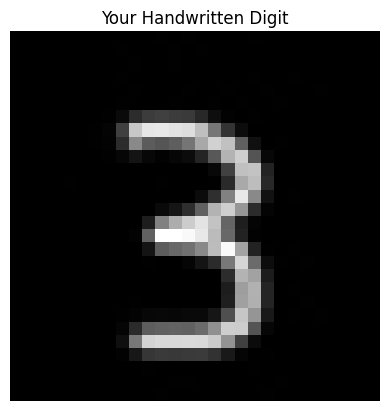

🧠 Predicted Digit: 3
✅ Model Confidence: 89.11%


In [22]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

# 1. 🖼️ Load the image as grayscale
testimage = imread("./testimage.jpg", as_gray=True)

# 2. ✂️ Resize to 28x28 to match MNIST format
testimage = resize(testimage, (28, 28), anti_aliasing=True)

# 3. 📊 Display the image using matplotlib
plt.imshow(testimage, cmap='gray')
plt.title("Your Handwritten Digit")
plt.axis('off')
plt.show()

# 4. 🔄 Flatten the image to 1D and normalize
testimage_flat = testimage.reshape(1, -1)
testimage_flat = testimage_flat.astype('float32') / 1.0  # Ensure float + scale

# 5. ✅ Make sure you're using the MNIST-trained model!
# Replace `log_reg` with your model's variable name if different
model = log_reg  # or svm_linear if using SVM

# 6. 🎯 Predict
prediction = model.predict(testimage_flat)
print("🧠 Predicted Digit:", prediction[0])

# 7. 🔎 Show confidence (only works with models like LogisticRegression that support predict_proba)
if hasattr(model, "predict_proba"):
    probs = model.predict_proba(testimage_flat)
    confidence = np.max(probs)
    print(f"✅ Model Confidence: {confidence * 100:.2f}%")
elif hasattr(model, "decision_function"):
    decision = model.decision_function(testimage_flat)
    confidence = np.max(decision)
    print(f"✅ Decision score: {confidence:.2f} (not a probability)")
else:
    print("⚠️ Model doesn't support confidence scoring.")


High confidence (>85%) usually means the digit is written clearly and matches patterns the model has seen during training.

🔍 If the prediction is correct, it means our digit is well-formed, stroke-wise.

If the prediction is wrong, that means the digit may be ambiguous or messy, and the model is still pretty confident — which could be a false sense of certainty (important in critical systems).

In [23]:
# Predict on test_Kaggle.csv
test_kaggle = pd.read_csv("test_Kaggle.csv")
test_kaggle = test_kaggle.astype("float32") / 255.0
pred_kaggle = log_reg.predict(test_kaggle)

# Create submission CSV
submission = pd.DataFrame({"ImageId": np.arange(1, len(pred_kaggle)+1), "Label": pred_kaggle})
submission.to_csv("submission.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
